# Importing Reqirments. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pint
import os
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

Unit Regestery for following units propperly using pint 

In [3]:
unit = pint.UnitRegistry()

# RAW DATA 

In [27]:

# ! <mA, mV>
TABLE_3_3 = np.array([
    [2.0, 31.7],
    [5.0, 74.8], 
    [10.0, 154.4],
    [15.0, 271],
    [20.0, 457], 
    [25.0, 556]
    ]) * np.array([unit.milliampere, unit.millivolt])

# ! <n, mV>
TABLE_3_4 = np.array([
    [300, 556],
    [200, 350],
    [100, 150]
]) * np.array([unit.dimensionless, unit.millivolt])

# ! <mm, mV>
TABLE_3_5 = np.array([
    [41, 556],
    [33, 338],
    [26, 183]
]) * np.array([unit.millimeter, unit.millivolt])

# Creating Raw DataFrame

after creating dataframes turn them to latex

In [28]:


df_table_3_3 = pd.DataFrame(TABLE_3_3, columns=['Current (mA)', 'Voltage (mV)'])
df_table_3_4 = pd.DataFrame(TABLE_3_4, columns=['Coil Turns (n)', 'Voltage (mV)'])
df_table_3_5 = pd.DataFrame(TABLE_3_5, columns=['Diameter (mm)', 'Voltage (mV)'])

df_table_3_3.to_latex('Table_3_3.tex', index=False, float_format="%.2f")
df_table_3_4.to_latex('Table_3_4.tex', index=False, float_format="%.2f")
df_table_3_5.to_latex('Table_3_5.tex', index=False, float_format="%.2f")


print("LaTeX files saved successfully!")

LaTeX files saved successfully!


c:\Users\Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\missing.py:225: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return _isna_array(np.asarray(obj), inf_as_na=inf_as_na)


In [42]:
Data = {
    "$\epsilon(I_0)$": df_table_3_3,
    "$\epsilon(n)$": df_table_3_4,
    "$\epsilon(d)$": df_table_3_5,
     
}
for table_name, table_data in Data.items():
    print(f"\n{table_name}:")
    for row in table_data:
        print(f"| x: {row[0]} | y: {row[1]} |")


$\epsilon(I_0)$:
| x: C | y: u |
| x: V | y: o |

$\epsilon(n)$:
| x: C | y: o |
| x: V | y: o |

$\epsilon(d)$:
| x: D | y: i |
| x: V | y: o |


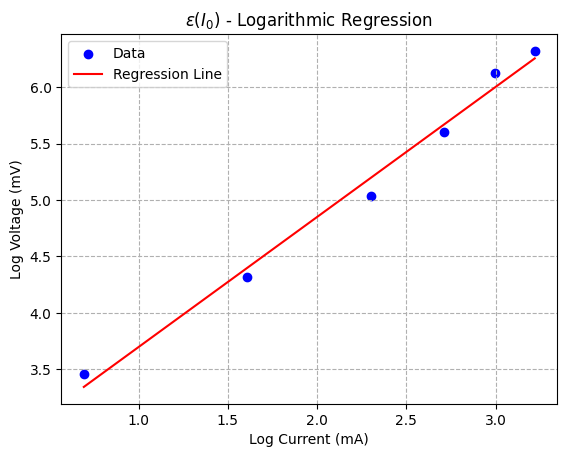

Slope for $\epsilon(I_0)$: 1.1526


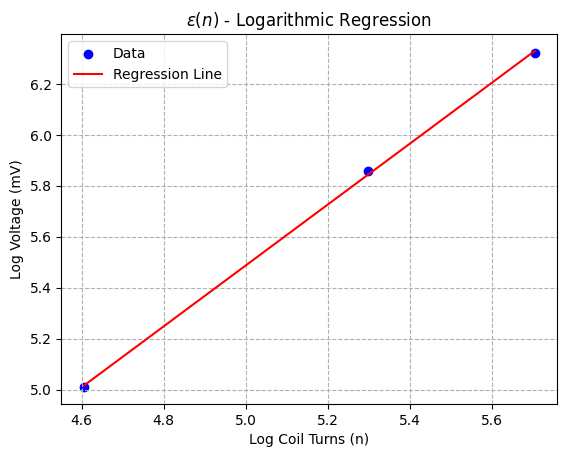

Slope for $\epsilon(n)$: 1.1957


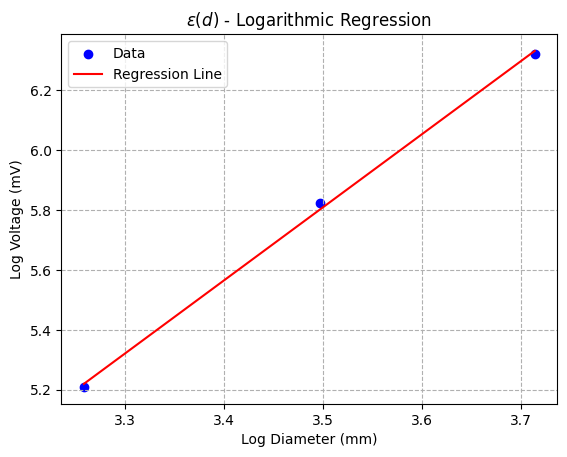

Slope for $\epsilon(d)$: 2.4420
Slopes for each table: {'$\\epsilon(I_0)$': 1.1526114303500337, '$\\epsilon(n)$': 1.1957496161099381, '$\\epsilon(d)$': 2.442013545306822}


In [56]:
slopes = {}  # Dictionary to store slopes

# Specify the directory to save the PNG files
output_directory = "output_plots/"  # Ensure this directory exists or create it

# Create the directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for table_name, table_data in Data.items():
    # Extract x and y data as Pint quantities
    x_data = table_data.iloc[:, 0].apply(lambda x: x.magnitude).values  # Get the first column
    y_data = table_data.iloc[:, 1].apply(lambda x: x.magnitude).values  # Get the second column

    # Check if values are positive for log transformation
    if np.all(x_data > 0) and np.all(y_data > 0):
        # Take logarithm of x and y data
        log_x_data = np.log(x_data)
        log_y_data = np.log(y_data)

        # Reshape log_x_data for sklearn
        log_x_data = log_x_data.reshape(-1, 1)  # Reshape to a 2D array for sklearn

        # Create scatter plot using the logarithmic values
        plt.scatter(log_x_data, log_y_data, label="Data", c="blue")

        # Perform regression on the logarithmic values
        model = LinearRegression()
        model.fit(log_x_data, log_y_data)  # Fit the model

        # Make predictions
        log_y_pred = model.predict(log_x_data)

        # Calculate the slope (coefficient) of the regression line
        slope = model.coef_[0]
        slopes[table_name] = slope  # Store the slope in the dictionary

        # Plot regression line
        plt.plot(log_x_data, log_y_pred, color='red', label='Regression Line')

        # Set plot title and labels based on the DataFrame name
        plt.title(f"{table_name} - Logarithmic Regression")

        if table_name == "$\epsilon(I_0)$":
            plt.xlabel("Log Current (mA)")
        elif table_name == "$\epsilon(n)$":
            plt.xlabel("Log Coil Turns (n)")
        elif table_name == "$\epsilon(d)$":
            plt.xlabel("Log Diameter (mm)")

        plt.ylabel("Log Voltage (mV)")

        # Add legend and grid
        plt.legend()
        plt.grid(True, which="both", linestyle='--')  # Add gridlines for both scales

        # Save the plot as a PNG file with a simpler name
        safe_table_name = table_name.replace('$', '').replace('(', '').replace(')', '').replace(' ', '_')
        plt.savefig(f"{output_directory}{safe_table_name}.png", dpi=300)
        
        # Show the plot
        plt.show()

        # Print the slope of the regression line
        print(f"Slope for {table_name}: {slope:.4f}")
    else:
        print(f"Data for {table_name} contains non-positive values, skipping logarithmic transformation.")

# Output the slopes dictionary
print("Slopes for each table:", slopes)

In [66]:
np.tensordot(np.array([[0.2],[0.8] ]), np.array([[0.9],[0.1]]), axes=0)

array([[[[0.18],
         [0.02]]],


       [[[0.72],
         [0.08]]]])

In [67]:
np.tensordot(np.array([[0],[1] ]), np.array([[1],[0]]), axes=0)

array([[[[0],
         [0]]],


       [[[1],
         [0]]]])

In [72]:
pmi = lambda A : sum(A**2)
a = [2/3, 1/3,  0]
pmi(np.array(a))

0.5555555555555556